In [1]:
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [2]:
df_tesla = pdr.get_data_yahoo('TSLA')

In [3]:
type(df_tesla)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='Date'>

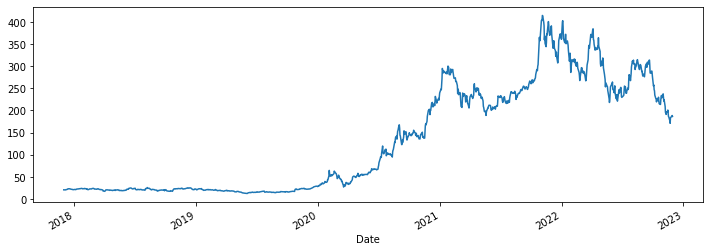

In [4]:
df_tesla['High'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

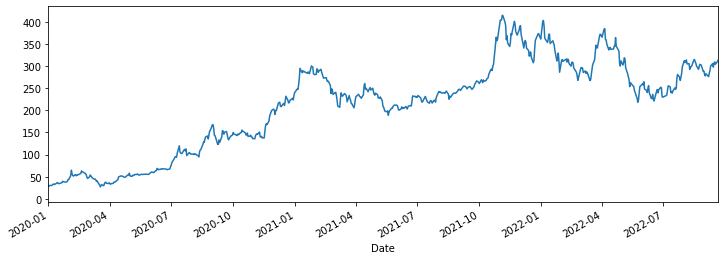

In [5]:
df_tesla['High'].plot(xlim=['2020-01-01','2022-09-20'],figsize=(12,4) )

<AxesSubplot:xlabel='Date'>

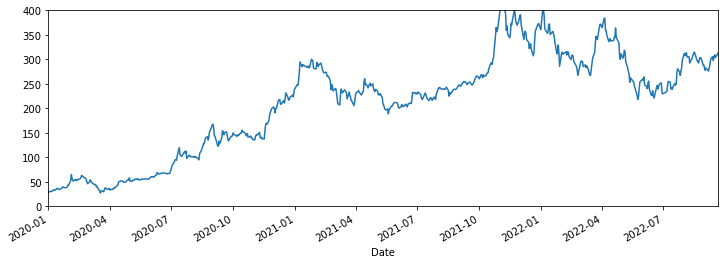

In [6]:
df_tesla['High'].plot(xlim=['2020-01-01','2022-09-20'],figsize=(12,4), ylim=[0,400])

In [7]:
index = df_tesla.loc['2020-01-01':'2022-09-20'].index
share_open = df_tesla.loc['2020-01-01':'2022-09-20']['Open']

In [8]:
share_open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2022-09-14    292.239990
2022-09-15    301.829987
2022-09-16    299.609985
2022-09-19    300.089996
2022-09-20    306.910004
Name: Open, Length: 685, dtype: float64

In [9]:
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-12',
               '2022-09-13', '2022-09-14', '2022-09-15', '2022-09-16',
               '2022-09-19', '2022-09-20'],
              dtype='datetime64[ns]', name='Date', length=685, freq=None)

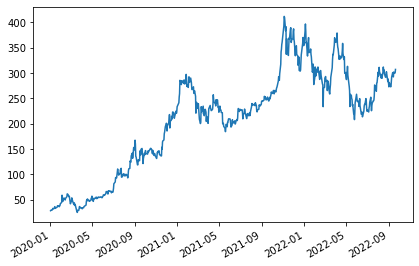

In [10]:
figure,axis = plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()  ##Preventing Overlapping
axis.plot(index, share_open)

In [11]:
df_tesla = df_tesla.reset_index()

In [12]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   High       1258 non-null   float64       
 2   Low        1258 non-null   float64       
 3   Open       1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Volume     1258 non-null   float64       
 6   Adj Close  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 68.9 KB


In [13]:
df_tesla=df_tesla.set_index('Date')

In [14]:
datetime.now()

datetime.datetime(2022, 11, 30, 15, 55, 32, 346135)

## Time Resampling

In [15]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-30,20.713333,20.302668,20.570667,20.590000,65274000.0,20.590000
2017-12-01,20.688000,20.336666,20.362667,20.435333,64393500.0,20.435333
2017-12-04,20.551332,20.040667,20.433332,20.346666,87526500.0,20.346666
2017-12-05,20.533333,20.066668,20.133333,20.246668,69697500.0,20.246668
2017-12-06,20.892668,20.000000,20.006666,20.884001,107929500.0,20.884001


In [16]:
df_tesla.resample(rule='A').min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,20.533333,20.000000,20.006666,20.246668,52027500.0,20.246668
2018-12-31,17.355333,16.306000,16.851999,16.704000,46210500.0,16.704000
2019-12-31,12.445333,11.799333,12.073333,11.931333,36984000.0,11.931333
2020-12-31,26.990667,23.367332,24.980000,24.081333,52073100.0,24.081333
2021-12-31,188.736664,179.830002,184.183334,187.666672,29401800.0,187.666672
2022-12-31,170.919998,166.190002,168.630005,167.869995,41864700.0,167.869995


In [17]:
df_tesla.resample(rule='A').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,23.162666,22.505333,22.993334,22.896667,130998000.0,22.896667
2018-12-31,25.830667,24.474667,25.000000,25.304667,504745500.0,25.304667
2019-12-31,29.020666,28.423332,29.000000,28.729334,450091500.0,28.729334
2020-12-31,239.573334,230.373337,233.330002,235.223328,914082000.0,235.223328
2021-12-31,414.496674,405.666656,411.470001,409.970001,268189500.0,409.970001
2022-12-31,402.666656,378.679993,396.516663,399.926666,151565700.0,399.926666


<AxesSubplot:xlabel='Date'>

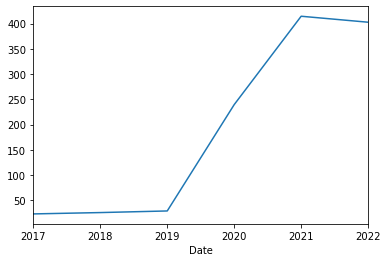

In [18]:
# Rule A means year end frequency

#https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78

df_tesla.resample(rule='A').max()['High'].plot()

<AxesSubplot:xlabel='Date'>

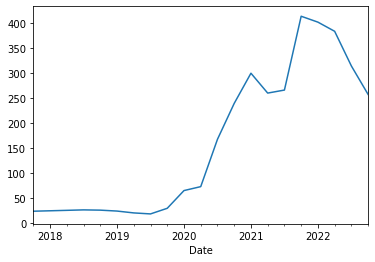

In [19]:
# Rule QS means quarterly frequency
df_tesla.resample(rule='QS').max()['High'].plot()

In [20]:
# Rule BA means Business End frequency
df_tesla.resample(rule='BA').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-29,23.162666,22.505333,22.993334,22.896667,130998000.0,22.896667
2018-12-31,25.830667,24.474667,25.000000,25.304667,504745500.0,25.304667
2019-12-31,29.020666,28.423332,29.000000,28.729334,450091500.0,28.729334
2020-12-31,239.573334,230.373337,233.330002,235.223328,914082000.0,235.223328
2021-12-31,414.496674,405.666656,411.470001,409.970001,268189500.0,409.970001
2022-12-30,402.666656,378.679993,396.516663,399.926666,151565700.0,399.926666


<AxesSubplot:xlabel='Date'>

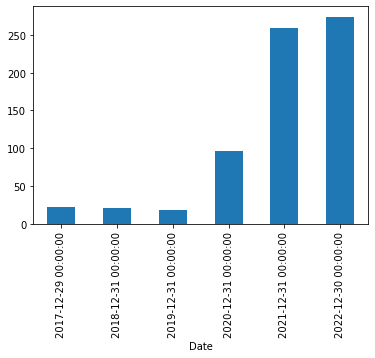

In [21]:
df_tesla['Open'].resample(rule='BA').mean().plot(kind ='bar')

<AxesSubplot:xlabel='Date'>

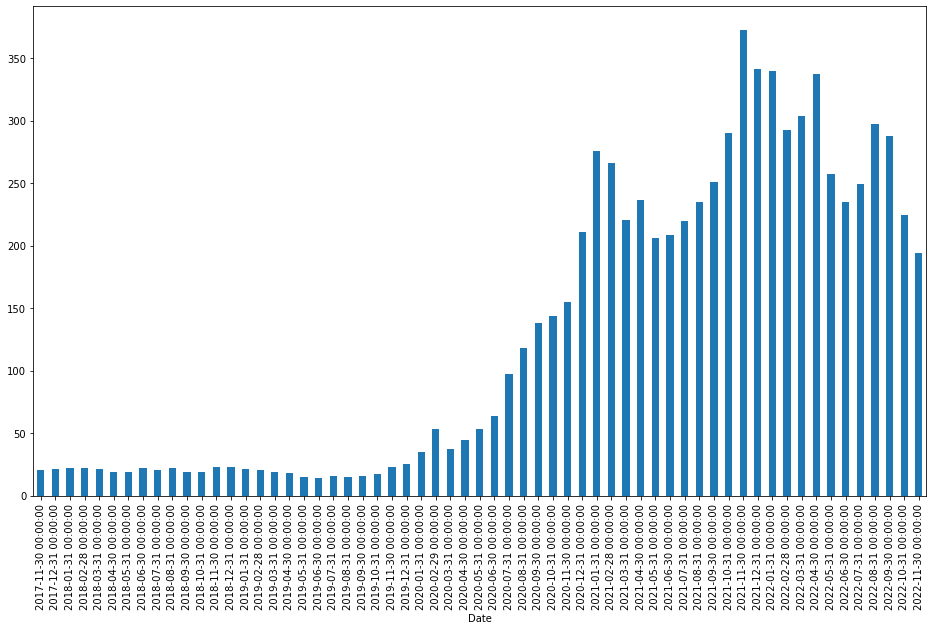

In [22]:
df_tesla['Open'].resample(rule='M').mean().plot(kind ='bar', figsize = (16,9))

In [23]:
df_tesla['High'].rolling(10).mean().head(20)

##In here the rolling extension calculate the first two rows for mean and then
##went on with the found mean and use it with third number for mean and so on...

Date
2017-11-30          NaN
2017-12-01          NaN
2017-12-04          NaN
2017-12-05          NaN
2017-12-06          NaN
2017-12-07          NaN
2017-12-08          NaN
2017-12-11          NaN
2017-12-12          NaN
2017-12-13    21.339733
2017-12-14    21.584667
2017-12-15    21.808533
2017-12-18    22.064933
2017-12-19    22.288200
2017-12-20    22.419600
2017-12-21    22.520333
2017-12-22    22.613267
2017-12-26    22.579467
2017-12-27    22.421067
2017-12-28    22.231733
Name: High, dtype: float64

In [24]:
df_tesla['Open:30 Days Rolling'] = df_tesla['Open'].rolling(30).mean()

<AxesSubplot:xlabel='Date'>

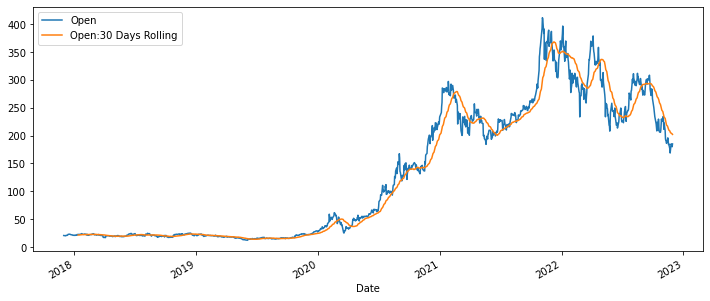

In [25]:
df_tesla[['Open','Open:30 Days Rolling']].plot(figsize=(12,5))

In [26]:
df_tesla2 = pdr.get_data_yahoo('TSLA')
df_tesla2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-30,20.713333,20.302668,20.570667,20.590000,65274000.0,20.590000
2017-12-01,20.688000,20.336666,20.362667,20.435333,64393500.0,20.435333
2017-12-04,20.551332,20.040667,20.433332,20.346666,87526500.0,20.346666
2017-12-05,20.533333,20.066668,20.133333,20.246668,69697500.0,20.246668
2017-12-06,20.892668,20.000000,20.006666,20.884001,107929500.0,20.884001
...,...,...,...,...,...,...
2022-11-22,170.919998,166.190002,168.630005,169.910004,78452300.0,169.910004
2022-11-23,183.619995,172.500000,173.570007,183.199997,109536700.0,183.199997
2022-11-25,185.199997,180.630005,185.059998,182.860001,50672700.0,182.860001


Simple Moving Average is nothing but a simple mathematical average calculation with a twist of the dispplay window i.e it is upon user to look for a specific number of data to  calculate SMA.

<AxesSubplot:xlabel='Date'>

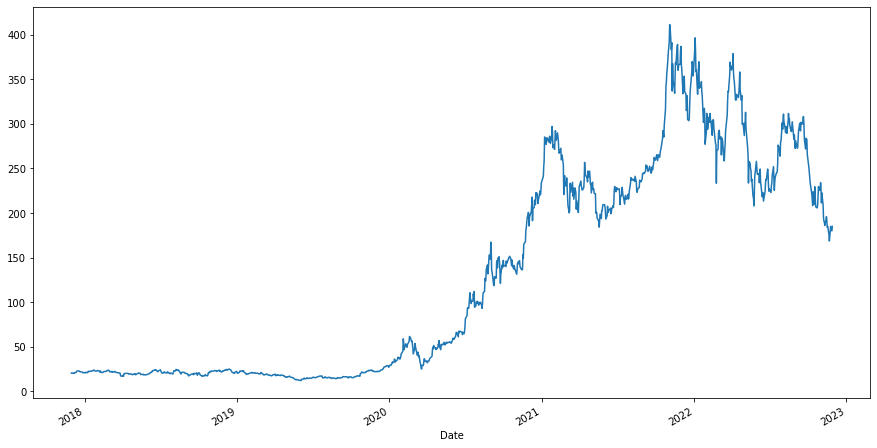

In [27]:
df_tesla2['Open'].plot(figsize = (15,8))

In [28]:
df_tesla2['Open: 10 Days Rolling']= df_tesla2['Open'].rolling(window=10, min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

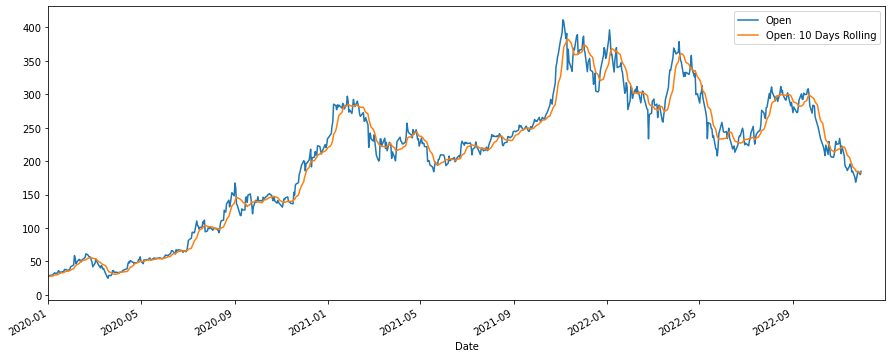

In [29]:
df_tesla2[['Open','Open: 10 Days Rolling']].plot(xlim = ['2020-01-01', '2022-12-31'],figsize=(15,6))

In [30]:
df_tesla2['Open: 30 Days Rolling']= df_tesla2['Open'].rolling(window=30, min_periods=1).mean()
df_tesla2['Open: 50 Days Rolling']= df_tesla2['Open'].rolling(window=50, min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

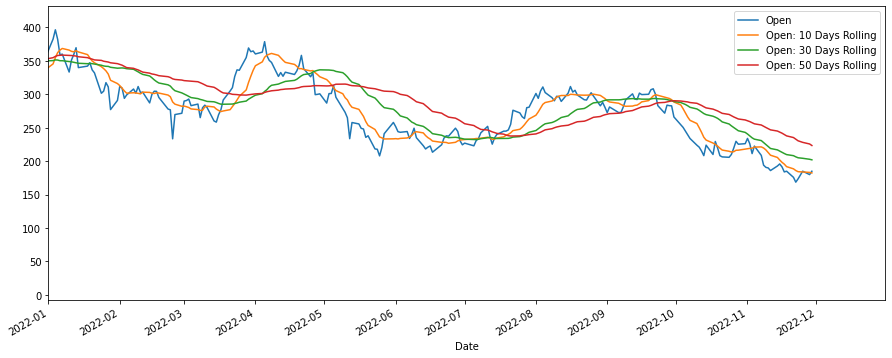

In [31]:
df_tesla2[['Open','Open: 10 Days Rolling','Open: 30 Days Rolling','Open: 50 Days Rolling']].plot(xlim = ['2022-01-01', '2022-12-31'],figsize=(15,6))

Cumulative Moving Average AKA CMA is also a moving average in which you can take particular count of observations to get the average.

<AxesSubplot:xlabel='Date'>

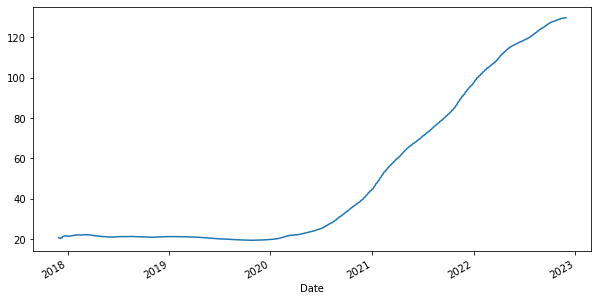

In [34]:
##Expanding
##CMA
df_tesla2['Open'].expanding().mean().plot(figsize=(10,5))

In [39]:
#df_tesla2.to_csv('tesla2.csv')

In [40]:
##EMA
# smoothing factor - 0.1

df_tesla2['EMA_0.1']= df_tesla2['Open'].ewm(alpha=0.1, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

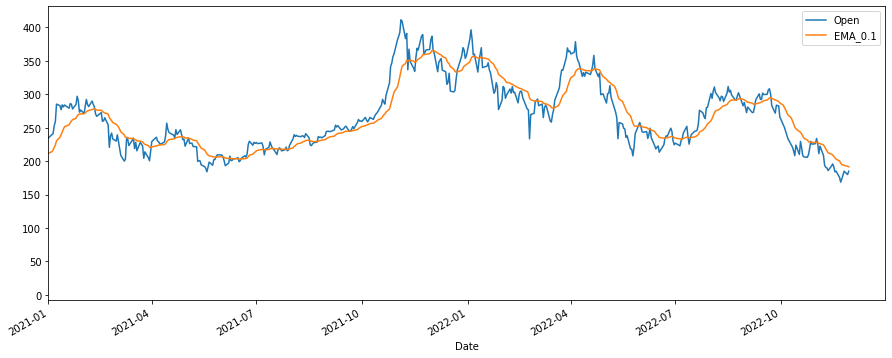

In [42]:
df_tesla2[['Open','EMA_0.1']].plot(xlim = ['2021-01-01', '2022-12-31'],figsize=(15,6))

In [43]:
df_tesla2['EWMA: 5 Days']= df_tesla2['Open'].ewm(span=5, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

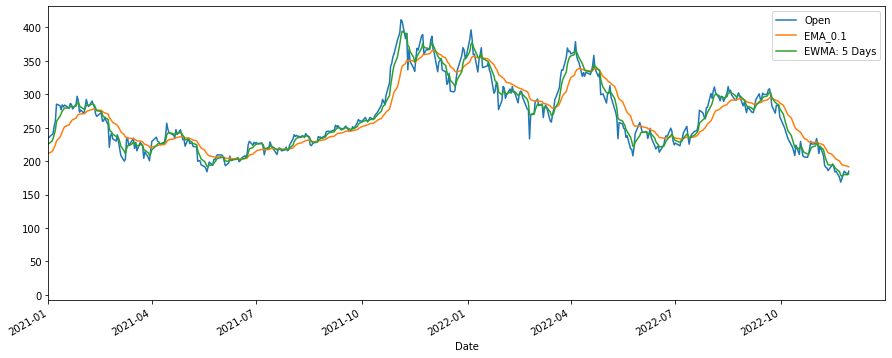

In [44]:
df_tesla2[['Open','EMA_0.1','EWMA: 5 Days']].plot(xlim = ['2021-01-01', '2022-12-31'],figsize=(15,6))